In [30]:
import os
import numpy as np
import copy
from pyuvdata import UVBeam
from pyuvdata.data import DATA_PATH
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filenames = ['HERA_NicCST_150MHz.txt', 'HERA_NicCST_123MHz.txt']
cst_files = [os.path.join(DATA_PATH, f) for f in filenames]


In [31]:
power_beam = UVBeam()
power_beam.read_cst_beam(cst_files[0], beam_type='power', frequency=150e6,
                         telescope_name='TEST', feed_name='bob',
                         feed_version='0.1', feed_pol=['x'],
                         model_name='E-field pattern - Rigging height 4.9m',
                         model_version='1.0')
power_beam_hpx = copy.deepcopy(power_beam)
power_beam_hpx.az_za_to_healpix()

In [55]:
efield_beam = UVBeam()
efield_beam.read_cst_beam(cst_files[0], beam_type='efield', frequency=150e6,
                          telescope_name='TEST', feed_name='bob',
                          feed_version='0.1', feed_pol=['x'],
                          model_name='E-field pattern - Rigging height 4.9m',
                          model_version='1.0')
efield_beam_pwr = copy.deepcopy(efield_beam)
efield_beam_pwr.efield_to_power(calc_cross_pols=False)
efield_beam_hpx = copy.deepcopy(efield_beam)
efield_beam_hpx.az_za_to_healpix()
efield_beam_hpx_pwr = copy.deepcopy(efield_beam_hpx)
efield_beam_hpx_pwr.efield_to_power(calc_cross_pols=False)

In [36]:
print(efield_beam.data_array.shape)
print(efield_beam_hpx.data_array.shape)

(2, 1, 2, 1, 181, 360)
(1, 1, 2, 1, 49152)


In [37]:
print(power_beam.data_array.shape)
print(power_beam_hpx.data_array.shape)

(1, 1, 2, 1, 181, 360)
(1, 1, 2, 1, 49152)


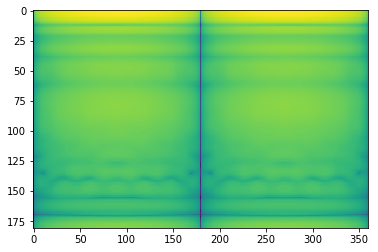

In [51]:
plt.imshow(np.log10(np.abs(efield_beam.data_array[0,0,0,0,:,:])), aspect='auto')

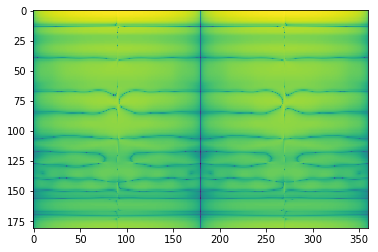

In [65]:
plt.imshow(np.log10(np.abs(efield_beam.data_array[0,0,0,0,:,:].real)), aspect='auto')

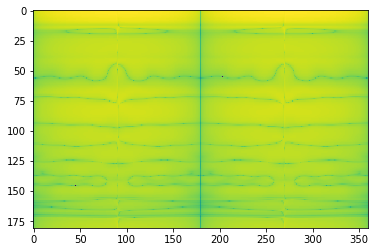

In [66]:
plt.imshow(np.log10(np.abs(efield_beam.data_array[0,0,0,0,:,:].imag)), aspect='auto')

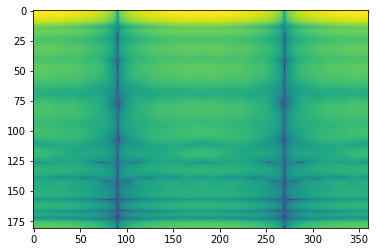

In [49]:
plt.imshow(np.log10(np.abs(efield_beam.data_array[1,0,0,0,:,:])), aspect='auto')

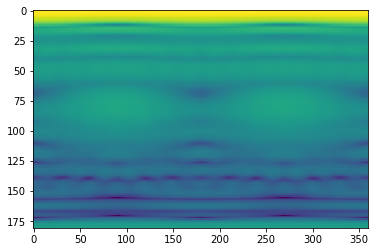

In [48]:
plt.imshow(np.log10(efield_beam_pwr.data_array[0,0,0,0,:,:]), aspect='auto')

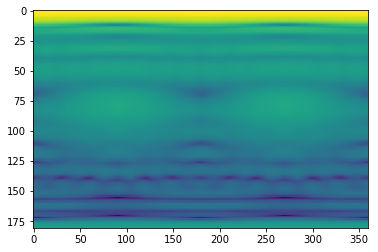

In [47]:
plt.imshow(np.log10(power_beam.data_array[0,0,0,0,:,:]), aspect='auto')

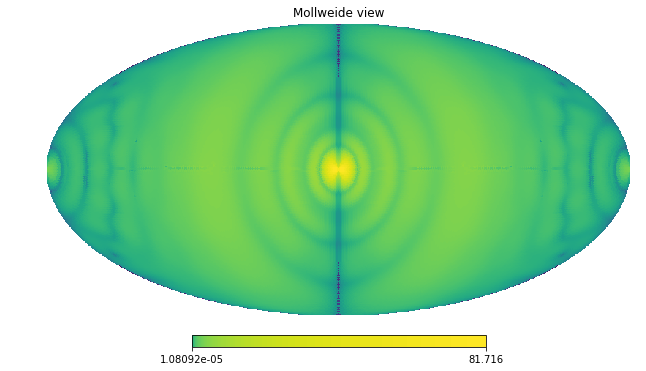

In [57]:
hp.mollview(np.abs(efield_beam_hpx.data_array[0,0,0,0,:]), rot=[0,90], norm='log')

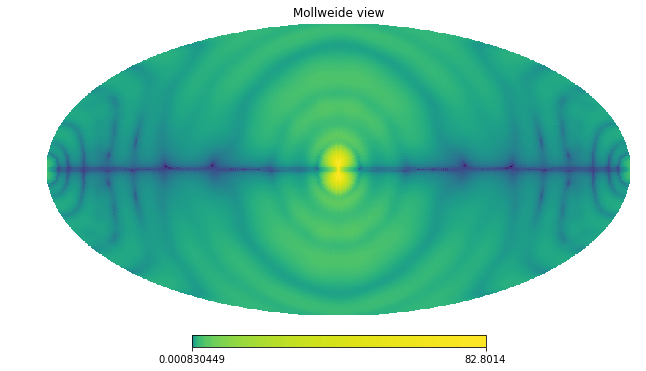

In [58]:
hp.mollview(np.abs(efield_beam_hpx.data_array[1,0,0,0,:]), rot=[0,90], norm='log')

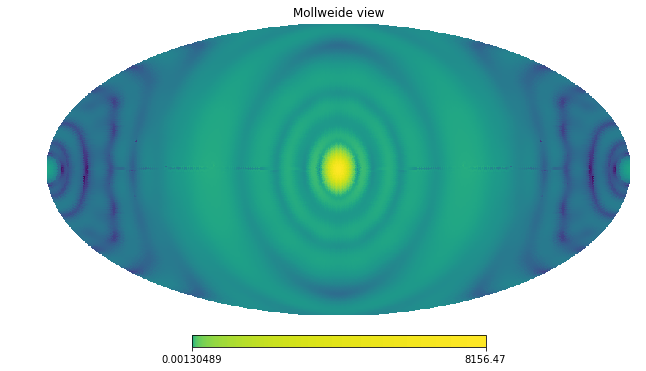

In [39]:
hp.mollview(efield_beam_hpx_pwr.data_array[0,0,0,0,:], rot=[0,90], norm='log')

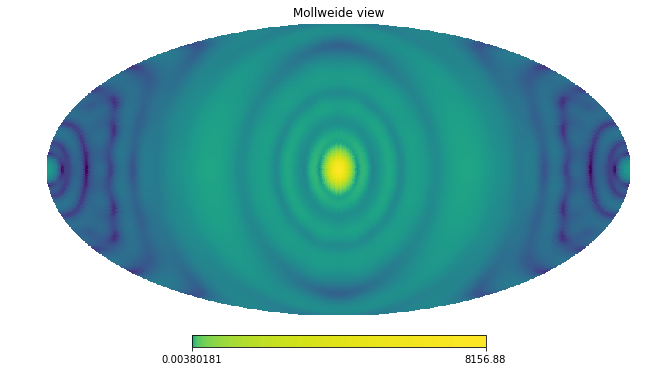

In [52]:
hp.mollview(power_beam_hpx.data_array[0,0,0,0,:], rot=[0,90], norm='log')

In [53]:
diff = power_beam_hpx.data_array - efield_beam_hpx_pwr.data_array

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


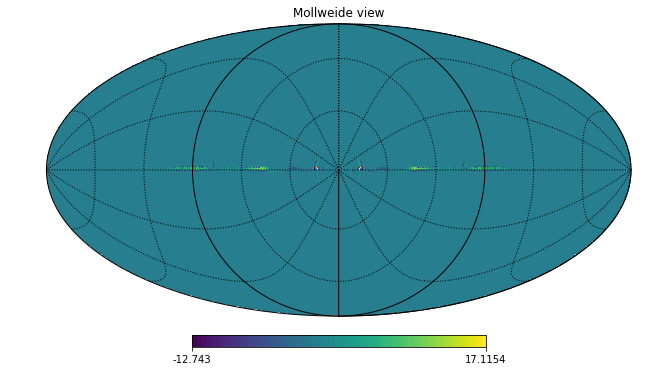

In [54]:
hp.mollview(diff[0,0,0,0,:], rot=[0,90])
hp.graticule()

In [20]:
print(np.max(diff))
print(np.min(diff))

17.439591882320173
-13.457044113373847


In [21]:
ratio = diff / power_beam_hpx.data_array

In [22]:
print(np.max(ratio))
print(np.min(ratio))

0.9776226855049086
-1.1712078632247784


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


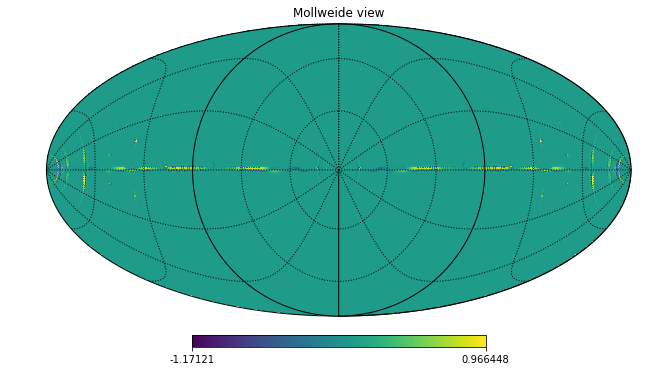

In [23]:
hp.mollview(ratio[0,0,0,0,:], rot=[0,90])
hp.graticule()